In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('https://query1.finance.yahoo.com/v7/finance/download/MSFT?period1=1262304000&period2=1619529600&interval=1d&events=history&includeAdjustedClose=true')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,30.620001,31.100000,30.590000,30.950001,23.623903,38409100
1,2010-01-05,30.850000,31.100000,30.639999,30.959999,23.631531,49749600
2,2010-01-06,30.879999,31.080000,30.520000,30.770000,23.486509,58182400
3,2010-01-07,30.629999,30.700001,30.190001,30.450001,23.242252,50559700
4,2010-01-08,30.280001,30.879999,30.240000,30.660000,23.402542,51197400
...,...,...,...,...,...,...,...
2842,2021-04-20,257.820007,260.200012,256.839996,258.260010,253.684616,19722900
2843,2021-04-21,258.940002,260.679993,257.250000,260.579987,255.963501,24030400
2844,2021-04-22,260.209991,261.779999,255.639999,257.170013,252.613968,25606200
2845,2021-04-23,257.880005,261.510010,257.269989,261.149994,256.523438,21462600


In [4]:
data = df.filter(['Date', 'Close'])
data

,Date,Close
0,2010-01-04,30.950001
1,2010-01-05,30.959999
2,2010-01-06,30.770000
3,2010-01-07,30.450001
4,2010-01-08,30.660000
...,...,...
2842,2021-04-20,258.260010
2843,2021-04-21,260.579987
2844,2021-04-22,257.170013
2845,2021-04-23,261.149994


In [5]:
train_data = data[:-200]
test_data = data[-200:]

In [6]:
scaler = MinMaxScaler(feature_range=(0, 1))
train_data_scaled = scaler.fit_transform(train_data['Close'].values.reshape(-1, 1))

In [7]:
def create_sequences(data, seq_length):
    xs = []
    ys = []
    for i in range(seq_length, len(data)):
        xs.append(data[i-seq_length:i])
        ys.append(data[i])
    return np.array(xs), np.array(ys)


In [8]:
seq_length = 60
x_train, y_train = create_sequences(train_data_scaled, seq_length)

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(50, return_sequences=True, input_shape=(seq_length, 1)),
    tf.keras.layers.LSTM(50, return_sequences=False),
    tf.keras.layers.Dense(25),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(x_train, y_train, epochs=50, batch_size=16)

Epoch 1/50
162/162 [==============================] - 9s 32ms/step - loss: 0.0031
Epoch 2/50
162/162 [==============================] - 5s 33ms/step - loss: 2.1190e-04
Epoch 3/50
162/162 [==============================] - 5s 33ms/step - loss: 1.8553e-04
Epoch 4/50
162/162 [==============================] - 5s 34ms/step - loss: 2.5151e-04
Epoch 5/50
162/162 [==============================] - 5s 34ms/step - loss: 1.9004e-04
Epoch 6/50
162/162 [==============================] - 5s 33ms/step - loss: 2.0069e-04
Epoch 7/50
162/162 [==============================] - 5s 33ms/step - loss: 2.0579e-04
Epoch 8/50
162/162 [==============================] - 5s 33ms/step - loss: 1.9515e-04
Epoch 9/50
162/162 [==============================] - 5s 33ms/step - loss: 1.3738e-04
Epoch 10/50
162/162 [==============================] - 5s 33ms/step - loss: 1.5108e-04
Epoch 11/50
162/162 [==============================] - 5s 33ms/step - loss: 1.3421e-04
Epoch 12/50
162/162 [==============================] - 5

In [10]:
test_data_scaled = scaler.transform(test_data['Close'].values.reshape(-1, 1))

x_test, y_test = create_sequences(test_data_scaled, seq_length)

y_pred = model.predict(x_test)

y_pred = scaler.inverse_transform(y_pred)

5/5 [==============================] - 1s 15ms/step


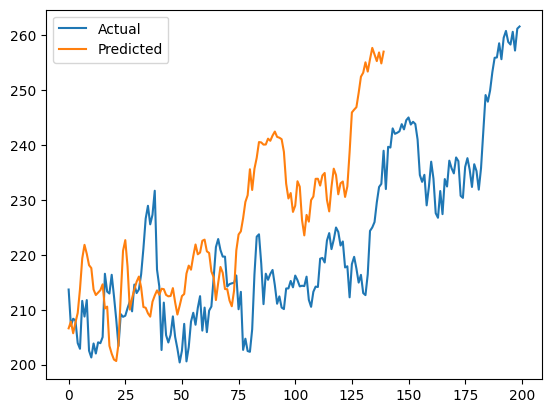

In [11]:
plt.plot(test_data['Close'].values)
plt.plot(y_pred)
plt.legend(['Actual', 'Predicted'])
plt.show()